# Multi-arm Bandits
## Feedback
**Evaluative Feedback**: 
- In it's pure form, depends only on the action taken
- Tells us how good was the action we took
- Doesn't tell us which action was best

**Instructive Feedback**:  
- In it's pure form, independent of the action taken
- Tells us which action was best to take
- Doesn't indicate how well our action (or any other for that matter) performed
- Used in its pure form for Supervised Learning


## K-armed Bandit

Faced with a choice of K different options / actions.  After each action, you receive an immidiate numerical reward (depends on the action).  
The objective is to Maximize the total reward over N time steps

$A_t$: Action selected at time $t$  
$R_t$: Reward for $A_t$  
$\large{q_*(a)}$: $\large{\mathbb{E}[R_t|A_t=a]}$    //The expected value of reward, given action $a$ is selected

So what is the problem?    We can just always choose the highest expected reward action!  
This is true! When we know $q*(a)$ we can be *greedy* and **exploit** this information and choose the most valueable action.  
BUT, In most situations we will not know what is $q*(a)$.  
Because we don't know what $q*(a)$ is, we will need to **explore** and increase our certainty about $q*(a)$ for different actions.  (Make $Q_t(a)$ as close to $q*(a)$ as possible)





## Action-Value Methods
This methods are used to evalate the true *value* of an action

### Method 1: *Sample Average*
The Value of an action is the mean reward from doing that action up to current time.  
We can easily formulate it to:
$\Large{Q_t(a) = \frac{\sum_{i=1}^{t-1}{R_i * \mathbb{1}_{A_i=a}}}{\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}}}}$  
$\mathbb{1}_{predicate}$ = 1 if true, else 0  

In this equation, $\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}} \rightarrow \infty$, $Q_t(a)$ $\rightarrow$ $q*(a)$  

We can couple this equation, with the selection method: $A_t=\underset{a}{\arg\max} {Q_t(a)}$ for a *greedy* selection process

#### $\large\epsilon-{greedy}$ Selection Method
Since we want to support **exploration** factor e for ~ $\epsilon$ of the times, we can set a rule so that:  
$A_t(e)= \{ \array{\underset{a}{\arg\max} {Q_t(a)} & with \ probability & 1-\epsilon \\ Random(a) & with \ probability & \epsilon } \}$  

In this case, we know that we **Explore** for $\epsilon$ of the time, and **Exploit** for $1-\epsilon$ of the time  

-----

**Exercise 2.1**: In $\epsilon$-greedy action selection, for the case of two actions and $\epsilon$ = 0.5, what is the probability that the greedy action is selected?  

**Answer**: The greedy action is selected $1-\epsilon$ of the times, so:  
$\epsilon=0.5 \| 1-\epsilon=0.5 \\ {Or} \\ $  
$\Pr(e|e\geq0.5) = 0.5 = 50\%$  

-----

## 10-armed Testbed

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class bandit_arm_v1():
    def __init__(self, mean: float, std: float):
        self.mean = mean
        self.std = std
        self.distribution = np.random.normal
        
    def r(self):
        while True:
            yield self.distribution(loc=self.mean, 
                                    scale=self.std)

class bandit_v1():
    def __init__(self, k: int, eps: float):
        self.A = self._create_arms(k)
        self.R = dict()
        self.epsilon = eps
        self.total_reward = 0
        self.cum_rewards = []
        
    def game(self, T: int):
        self.R = self._init_rewards()
        self.total_reward = 0
        for i in range(T):
            Rt = self.play()
            self.total_reward += Rt
            self.cum_rewards.append(self.total_reward)
        return self.total_reward
            
    def play(self):
        a = self._choose_action()
        return self._do_action(a)
        
    def _create_arms(self, k: int):
        return [bandit_arm_v1(np.random.normal(loc=0, scale=20), abs(np.random.normal(loc=0, scale=2))) for a in range(k)]
    
    def _init_rewards(self):
        rewards = dict()
        for arm in range(len(self.A)):
            rewards[arm] = np.zeros(1)
        return rewards
        
    def _Q(self, Ra: np.array):
        def _sample_average(Ra: np.array):
            mu = Ra.mean()
            return mu
    
        value_function = _sample_average
        return value_function(Ra)
    
    def _choose_action(self):
        r = np.random.uniform()
        if r > self.epsilon:
            Qt_with_indexes = [(self._Q(self.R[k]), k) for k in self.R.keys()]
            Qt = [r[0] for r in Qt_with_indexes]
            if Qt:
                chosen_arm =  np.argmax(Qt)
                chosen_arm = Qt_with_indexes[chosen_arm][1]
            else:
                chosen_arm = np.random.choice(range(len(self.A)))
        else:
            chosen_arm = np.random.choice(range(len(self.A)))
        return chosen_arm
    
    def _do_action(self, a):
        Rt = next(self.A[a].r())
        c = self.R.setdefault(a, np.array([]))
        self.R[a] = np.append(self.R[a], Rt)
        return Rt

k = 5
epsilon = 0.1
b1 = bandit_v1(k, epsilon)
T = 2000
total_reward = b1.game(T)
optimal_reward = np.max(list(map(lambda x: x.mean, b1.A)))
total_optimal_reward = T * optimal_reward
print('K-Arm Bandit with Incremental-Sample-Average Q Function')
print(f'Total Reward: {total_reward}')
print(f'Optimal Reward: {optimal_reward}\tOptimal Total Reward: {total_optimal_reward}')
print(f'Regret: {total_optimal_reward - total_reward} / {100*(1-(total_reward/total_optimal_reward)):.2f}%')
for i in b1.R:
    print(f'arm {i}:\t # chosen: {len(b1.R[i])}\t mean: {np.mean(b1.R[i])}\t true: {b1.A[i].mean}\t delta: {abs(b1.A[i].mean-np.mean(b1.R[i]))}\t delta %: {abs(1-b1.A[i].mean/np.mean(b1.R[i]))}\n')

K-Arm Bandit with Incremental-Sample-Average Q Function
Total Reward: 31379.996035619253
Optimal Reward: 17.763630604770782	Optimal Total Reward: 35527.26120954156
Regret: 4147.265173922307 / 11.67%
arm 0:	 # chosen: 41	 mean: -7.126444136058912	 true: -7.3419678055252575	 delta: 0.2155236694663456	 delta %: 0.0302428062791964

arm 1:	 # chosen: 128	 mean: 13.851365511335352	 true: 14.082527636262604	 delta: 0.23116212492725197	 delta %: 0.016688760739010045

arm 2:	 # chosen: 37	 mean: -15.844734872624295	 true: -16.220333855699085	 delta: 0.37559898307478967	 delta %: 0.02370497115251391

arm 3:	 # chosen: 1761	 mean: 17.747797057488857	 true: 17.763630604770782	 delta: 0.01583354728192532	 delta %: 0.0008921415559710599

arm 4:	 # chosen: 38	 mean: -20.221314952739434	 true: -20.79069541142129	 delta: 0.5693804586818558	 delta %: 0.028157439811040685



-----

**Exercise 2.2**: Bandit example Consider a k-armed bandit problem with k = 4 actions, denoted 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using "-greedy action selection, sample-average action-value estimates, and initial estimates of Q1(a) = 0, for all a. Suppose the initial sequence of actions and rewards is A1 = 1, R1 = 1,A2 =2,R2 =1,A3 =2,R3 = 2,A4 =2,R4 =2,A5 =3,R5 =0. Onsome of these time steps the " case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred?

**Answer**:
According to the definition we have: $k=4$, Using Sample-Average and 0 initialization for $Q_1(a)$  
Lets track the algorithm:
- A1 = 1 / R1 = -1  # Must be random, all $Q_i(a)=0$
- A2 = 2 / R2 = 1   # Random, but only between $Q_i(a)\ where\ i \neq 1$
- A3 = 2 / R3 = -2  # Greedy action, $Q_2(A_2) = 1$
- A4 = 2 / R4 =2    # Random, $Q_3(A_2) = -0.5$ while $Q_3(A_3)\ \& \ Q_3(A_4) = 0$
- A5 = 3 / R5 =0    # Random / Greedy-Random betwen $A_3\ \& \ A_4$

-----

**Exercise 2.3**: In the comparison shown in Figure 2.2, which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.

**Answer**: Since we are being asked on the long run, we will simplify and assume that the algorithm always chosses the optimal action when not in $\epsilon$ (Exploratory) mode.  
Now, let's look at the algorithms:  

The difference between them is the $\epsilon$, And we will look at an example of:  
- $T: 1000$
- $RL1: \epsilon=0.1$ 
- $RL2: \epsilon=0.3$
- Notations:
  - $\mu(a^*)$: Mean of optimal action
  - $\mu(a)$: Mean for not-optimal actions

So, what will be the difference in cummulative rewards between 1 and 2?

$ T \times [(1-\epsilon_1)\mu(a^*) + \epsilon_1\mu(a)] - [(1-\epsilon_2)\mu (a^*) + \epsilon_2\mu(a)] = $  
$= T \times [(\epsilon_2 - \epsilon_1)\mu(a^*) + (\epsilon_1 - \epsilon_2)\mu(a)] =$  
$= T \times [(\epsilon_2 - \epsilon_1)\mu(a^*) - (\epsilon_2 - \epsilon_1)\mu(a)] =$  
$= T \times [(\epsilon_2 - \epsilon_1)\times(\mu(a^*) - \mu(a))] =$  
$= T \times \Delta\epsilon\times\Delta\mu =$  
$= 1000 \times 0.2\times(\mu(a^*)-\mu(a)) = 200 \times \Delta\mu $

-----

### Method 1.5: Incremental Sample-Average  

This is a computational imporvement over the last algortihm.  
It uses a mathematical "game" to calculate the sample-average using 2 variables per arm only (instead of saving the whole reward history).  

In the basic Sample-Average we use the value function:  
$\Large{Q_t(a) = \frac{\sum_{i=1}^{t-1}{R_i * \mathbb{1}_{A_i=a}}}{\sum_{i=1}^{t-1}{\mathbb{1}_{A_i=a}}}}$  

Which as we saw is very costly as we need to calculate $\sum_{i=1}^{t-1}{R_i * \mathbb{1}_{A_i=a}}$ at every timestamp.  
Instead, we can calculate only ${NewEstimate}\leftarrow{OldEstimate} + {StepSize}[{Target}-{OldEstimate}]$.  
Or in our terms: $Q_{t+1} = Q_t + \alpha[R_t - Q_t]$ where $\alpha=\frac{1}{n}$.  


In this version all we need to keep at each timestamp is only $Q_t$ and use our $\alpha$ and current $R_t$ to complete the update which takes *StepSize ($\alpha$)* towards *Target ($R_t$)*.

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

class bandit_arm_v2():
    def __init__(self, mean: float, std: float):
        self.mean = mean
        self.std = std
        self.distribution = np.random.normal
        
    def r(self):
        while True:
            yield self.distribution(loc=self.mean, 
                                    scale=self.std)

class bandit_v2():
    def __init__(self, k: int, eps: float):
        self.A = self._create_arms(k)
        self.R = dict()
        self.epsilon = eps
        self.n = 0
        self.chosen = np.zeros(k)
        self.total_reward = 0
        self.cum_rewards = []
        
    def game(self, T: int):
        self.R = self._init_rewards()
        self.total_reward = 0
        self.n = 0
        for i in range(T):
            self.n += 1
            Rt = self.play()
            self.total_reward += Rt
            self.cum_rewards.append(self.total_reward)
        return self.total_reward
            
    def play(self):
        a = self._choose_action()
        return self._do_action(a)
        
    def _create_arms(self, k: int):
        return [bandit_arm_v2(np.random.normal(loc=0, scale=20), abs(np.random.normal(loc=0, scale=2))) for a in range(k)]
    
    def _init_rewards(self):
        rewards = dict()
        for arm in range(len(self.A)):
            rewards[arm] = 0
        return rewards
    
    def _choose_action(self):
        r = np.random.uniform()
        if r > self.epsilon:
            Qt_with_indexes = [(self.R[k], k) for k in self.R.keys()]
            Qt = [r[0] for r in Qt_with_indexes]
            if Qt:
                chosen_arm =  np.argmax(Qt)
                chosen_arm = Qt_with_indexes[chosen_arm][1]
            else:
                chosen_arm = np.random.choice(range(len(self.A)))
        else:
            chosen_arm = np.random.choice(range(len(self.A)))
        return chosen_arm
    
    def _do_action(self, a):
        Rt = next(self.A[a].r())
        alpha = (1/self.n)
        self.R[a] += alpha * (Rt - self.R[a])
        self.chosen[a] += 1
        return Rt

k = 5
epsilon = 0.1
b2 = bandit_v2(k, epsilon)
T = 2000
total_reward = b2.game(T)
optimal_reward = np.max(list(map(lambda x: x.mean, b2.A)))
total_optimal_reward = T * optimal_reward
print('K-Arm Bandit with Incremental-Sample-Average Q Function')
print(f'Total Reward: {total_reward}')
print(f'Optimal Reward: {optimal_reward}\tOptimal Total Reward: {total_optimal_reward}')
print(f'Regret: {total_optimal_reward - total_reward} / {100*(1-(total_reward/total_optimal_reward)):.2f}%')
for i in b2.R:
    print(f'arm {i}:\t # chosen: {b2.chosen[i]:0.0f}\t mean: {b2.R[i]}\t true: {b2.A[i].mean}\t delta: {abs(b2.A[i].mean-b2.R[i])}\t delta %: {abs(1-b2.A[i].mean/np.mean(b2.R[i]))}\n')

K-Arm Bandit with Incremental-Sample-Average Q Function
Total Reward: 29915.15448694125
Optimal Reward: 38.88765981122818	Optimal Total Reward: 77775.31962245636
Regret: 47860.16513551511 / 61.54%
arm 0:	 # chosen: 1846	 mean: 16.520862993020028	 true: 16.565519071273872	 delta: 0.0446560782538441	 delta %: 0.0027030112332939726

arm 1:	 # chosen: 35	 mean: -0.667953330598793	 true: -8.995755230902391	 delta: 8.327801900303598	 delta %: 12.467640355708777

arm 2:	 # chosen: 45	 mean: -2.4194504690103837	 true: -25.328656608932416	 delta: 22.909206139922034	 delta %: 9.468764264181228

arm 3:	 # chosen: 39	 mean: 4.863880934113408	 true: 38.88765981122818	 delta: 34.02377887711477	 delta %: 6.995191563692472

arm 4:	 # chosen: 35	 mean: -1.1294930182479717	 true: -18.46294490188693	 delta: 17.33345188363896	 delta %: 15.346223131618803



In [51]:
print(f'Timing Sample-Average bandit over {T} turns')
%timeit (b1.game(T))

Timing Sample-Average bandit over 2000 turns
110 ms ± 511 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
print(f'Timing Incremental-Sample-Average bandit over {T} turns')
%timeit (b2.game(T))

Timing Incremental-Sample-Average bandit over 2000 turns
29.4 ms ± 463 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Non-Stationary Methods  
In the past algorithms we assumed that the Reward distribution in each of the arms stays the same throughout the process life.  
However, in many cases and mostly in real life, the Reward is **Non-Stationary (Dynamic - Changes with time)**.  

To accomodate for the Reward distribution change, we need to give our latest rewards higher value in our Q (value) function.   
This will enable the algorithm to both remember its past rewards while taking into account the present situation more carefuly.

The minimal change we can make to our current bandit algorithm to make it Non-Stationary is simply to use a **Fixed** $\large\alpha$

So, If we use our latest example, the update rule $Q_{t+1}\leftarrow Q_t + \alpha[R_t - Q_t]$ with $\alpha=\frac{1}{n}$.  This time, we use a fixed $\alpha\in(0, 1]$.  

The transition to a fixed $\alpha$ leads to the following update equation:
$Q_{n+1} = (1-\alpha)^nQ_1 + \sum_{i=1}^n{\alpha(1-\alpha)^{n-i}R_i}$.

We call this equation a **Weighted Average** because:
- The sum $(1-\alpha)^n + \sum_{i=1}^n{\alpha(1-\alpha)^{n-i}} = 1$

We will also note that $\alpha(1-\alpha)^{n-i}$ on $R_i$ increases as we get closer to $n$, **giving rescent rewards higher weight then earlier ones.**

-----

**Exercise 2.4**: If the step-size parameters, $\alpha_n$, are not constant, then the estimate $Q_n$ is a weighted average of previously received rewards with a weighting different from that given by (2.6) - ($Q_{t+1}\leftarrow Q_t + \alpha[R_t - Q_t]$ with $\alpha=\frac{1}{n}$)
- What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

**Answer**:

In the dynamic $\alpha$ case wheren $\alpha$ is always versioned as $\alpha_i$ the analysis is as follows:  

$Q_{n+1} \leftarrow Q_n + \alpha_n(R_n - Q_n) = $  
$Q_{n+1} \leftarrow \alpha_{n}R_n + (1-\alpha_n)Q_n = $  
$Q_{n+1} \leftarrow \alpha_{n}R_n + (1-\alpha_n)[\alpha_{n-1}R_{n-1} + (1-\alpha_{n-1})Q_{n-1}] =  ...  $  
$Q_{n+1} \leftarrow \alpha_{n}R_n + \sum_{i=n-1}^{1}{[\alpha_{i}R_i\times\Pi_{j=n}^{i}{(1-\alpha_j)}]} + Q_1 $  

So, by that we can see the reward's priors are $\alpha_n\times\Pi_{j=n}^{i}{(1-\alpha_j)}$

**Exercise 2.5 (programming)**: Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha$ = 0.1. Use $\epsilon$ = 0.1 and longer runs, say of 10,000 steps.

**Constant Alpha**
K-Arm Bandit with Incremental-Sample-Average Q Function
Total Reward: 321242.4998739323
Optimal Reward: 55.10699100579213	Optimal Total Reward: 551069.9100579213
Regret: 229827.41018398904 / 41.71%
arm 0:	 # chosen: 224	 mean: -7.50438171240501	 true: -0.9590284442988851	 delta: 6.545353268106125	 delta %: 0.872204202684203

arm 1:	 # chosen: 201	 mean: -26.26377949774405	 true: -30.913433595080818	 delta: 4.649654097336768	 delta %: 0.1770367474238106

arm 2:	 # chosen: 2965	 mean: -10.310591591009116	 true: -12.111606208518465	 delta: 1.8010146175093489	 delta %: 0.17467616689228982

arm 3:	 # chosen: 862	 mean: -20.526859890736702	 true: -23.28601262162964	 delta: 2.7591527308929393	 delta %: 0.13441669819834856

arm 4:	 # chosen: 5748	 mean: 56.51063161623431	 true: 55.10699100579213	 delta: 1.4036406104421815	 delta %: 0.024838522775224914

**Dynamic Alpha**
K-Arm Bandit with Incremental-Sample-Average Q Function
Total Reward: 543787.1070933247
Optimal Reward: 2

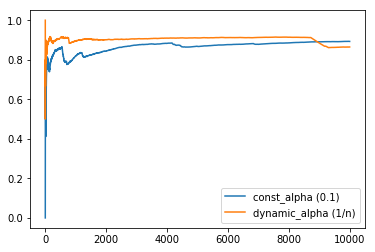

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

class bandit_arm_v3():
    def __init__(self, mean: float, std: float):
        # Start equally
        self.mean = 0
        self.std = 0.1
        
        # Random walk parameters
        self.mean_change = mean
        self.std_change = std
        
        self.distribution = np.random.normal
        
    def random_walk(self):
        self.mean += self.distribution(loc=self.mean_change,
                                       scale=self.std_change)
        
    def r(self):
        while True:
            self.random_walk()
            yield self.distribution(loc=self.mean, 
                                    scale=self.std)

class bandit_v3():
    def __init__(self, k: int, eps: float, const_alpha: bool):
        self.A = self._create_arms(k)
        self.R = dict()
        self.epsilon = eps
        self.n = 0
        self.chosen = np.zeros(k)
        self.total_reward = 0
        self.cum_rewards = []
        self.is_optimal = 0
        self.cum_optimal = []
        self.const_alpha = const_alpha
        
    def game(self, T: int):
        self.R = self._init_rewards()
        self.total_reward = 0
        self.n = 0
        for i in range(T):
            self.n += 1
            Rt = self.play()
            self.total_reward += Rt
            self.cum_rewards.append(self.total_reward)
            self.cum_optimal.append(self.is_optimal / (i+1))
        return self.total_reward
            
    def play(self):
        a = self._choose_action()
        self.is_optimal += self._is_optimal(a)
        return self._do_action(a)
        
    def _create_arms(self, k: int):
        return [bandit_arm_v3(0, 1) for a in range(k)]
    
    def _get_optimal_hand(self):
        hands_rewards = list(map(lambda arm: arm.mean, self.A))
        return np.argmax(hands_rewards)
    
    def _is_optimal(self, chosen_hand: int):
        return 1 if chosen_hand == self._get_optimal_hand() else 0
    
    def _init_rewards(self):
        rewards = dict()
        for arm in range(len(self.A)):
            rewards[arm] = 0
        return rewards
    
    def _choose_action(self):
        r = np.random.uniform()
        if r > self.epsilon:
            Qt_with_indexes = [(self.R[k], k) for k in self.R.keys()]
            Qt = [r[0] for r in Qt_with_indexes]
            if Qt:
                chosen_arm =  np.argmax(Qt)
                chosen_arm = Qt_with_indexes[chosen_arm][1]
            else:
                chosen_arm = np.random.choice(range(len(self.A)))
        else:
            chosen_arm = np.random.choice(range(len(self.A)))
        return chosen_arm
    
    def _do_action(self, a):
        Rt = next(self.A[a].r())
        alpha = 0.1 if self.const_alpha else (1/self.n)
        self.R[a] += alpha * (Rt - self.R[a])
        self.chosen[a] += 1
        return Rt

k = 5
epsilon = 0.1
T = 10000
bandit_const_alpha = bandit_v3(k, epsilon, True)
bandit_dynamic_alpha = bandit_v3(k, epsilon, False)

def run_simulation(bandit: bandit_v3):
    total_reward = bandit.game(T)
    optimal_reward = np.max(list(map(lambda x: x.mean, bandit.A)))
    total_optimal_reward = T * optimal_reward
    print('K-Arm Bandit with Incremental-Sample-Average Q Function')
    print(f'Total Reward: {total_reward}')
    print(f'Optimal Reward: {optimal_reward}\tOptimal Total Reward: {total_optimal_reward}')
    print(f'Regret: {total_optimal_reward - total_reward} / {100*(1-(total_reward/total_optimal_reward)):.2f}%')
    for i in bandit.R:
        print(f'arm {i}:\t # chosen: {bandit.chosen[i]:0.0f}\t mean: {bandit.R[i]}\t true: {bandit.A[i].mean}\t delta: {abs(bandit.A[i].mean-bandit.R[i])}\t delta %: {abs(1-bandit.A[i].mean/np.mean(bandit.R[i]))}\n')
    return bandit

print('**Constant Alpha**')
bc = run_simulation(bandit_const_alpha)
print('**Dynamic Alpha**')
bd = run_simulation(bandit_dynamic_alpha)
# sns.lineplot(range(T), b2.cum_optimal)


plt.plot(bc.cum_optimal, label='const_alpha (0.1)')
plt.plot(bd.cum_optimal, label='dynamic_alpha (1/n)')
plt.legend()
plt.show()

### Optimistic Initial Values
In **Stationary Problems** ($\alpha$ is constant) we can use a nice trick to save us exploration time.  
If we set the *Initial Values* to be Higher then what we expect, the sample-average algorithm will start by doing the exploration on the different actions and converge faster (or with less $\epsilon$) to the right action.

**Exercise 2.6**: Mysterious Spikes The results shown in Figure 2.3 should be quite reliable because they are averages over 2000 individual, randomly chosen 10-armed bandit tasks. Why, then, are there oscillations and spikes in the early part of the curve for the optimistic method? In other words, what might make this method perform particularly better or worse, on average, on particular early steps?

**Answer**: In the *Optimistic* algorithm we **Over-Value** the actions (being optimistic) in our initial evaluation.  
Because of this optimism, when the algorithm chooses the next **greedy** action, it chooses one of the over-evaluated hands.  When this happens our optimism meets reality and the value estimation $q(a)$ drops to the action's real value.  
When the value begins to drop, the other hands that are still over-valued are being chosen instead but then again we meet the usually harsher truth and the $q(a)$ drops.  This process keeps happening until we reach truthful evaluations for the possible actions.

So, The optimistic algorithm has 2 exploration mechanisms.
- $\epsilon$-greedy: Constant exploration rate
- Optimistic initial values: Early phase forced exploration

While the normal algorithm only has the $\epsilon$-greedy constant exploration rate and Naive initialization.

### UCB - Upper-Confidence-Bound Action Selection
Exploration is always needed in a MAB environment.   However, we can try and explore in a better way then simply randomly selecting an action.  
UCB is a method to select better exploration paths by using our gathered knowledge on the actions from our previous selections.

UCB is based on calculating the Upper Confidence Bound for the action's reward distribution which is given by:  
$A_t = \underset{a}{\arg\max}[{Q_t(a) + c\sqrt{\frac{\ln(t)}{N_t(a)}}}]$
* $N_t(a)$: Number of times $a$ has been selected prior to time $t$
* $c$: exploration confidence

The term under the sqrt estimates the uncertainty about $Q_t(a)$.  
When $a$ is selected, $N_t(a)$ increases. When $a$ is not selected, $\ln(t)$ increases.  
We can also see that although $\ln(t)$ is unbounded, it is increasing by a smaller amount each time giving $N_t(a)$ "an edge"


Knowing this uppper confidence bound enables us to estimate early on if an action can be the optimal one.  
We can now compare the UCB for each a instead of the $Q_t(A)$ directly.
We can use the same to calculate the LCB (Lower-Confidence-Bound).  When the $UCB_{a1} <= LCB_{a2}$ for some ($a1 \ne a2) \in A$ we can safely stop exploring or choosing this action.


Although good for stationary problems, the UCB algorithm doesn't work for non-stationary problems.

**UCB**
K-Arm Bandit with UCB Q Function
Total Reward: 7817.556411409742
Optimal Reward: 23.25300982224664	Optimal Total Reward: 23253.00982224664
Regret: 15435.453410836897 / 66.38%
arm 0:	 # chosen: 165	 mean: -394.3607586859547	 true: -7.2682831237619885	 delta: 387.0924755621927	 delta %: 0.9815694564845129

arm 1:	 # chosen: 246	 mean: -653.0734867482004	 true: -9.887362271508097	 delta: 643.1861244766923	 delta %: 0.9848602607943258

arm 2:	 # chosen: 60	 mean: -189.71659164385824	 true: -2.05270666800647	 delta: 187.66388497585177	 delta %: 0.9891801415457648

arm 3:	 # chosen: 514	 mean: 9115.163527497547	 true: 23.25300982224664	 delta: 9091.9105176753	 delta %: 0.9974489750236406

arm 4:	 # chosen: 15	 mean: -60.456279009790414	 true: -5.402430853590285	 delta: 55.05384815620013	 delta %: 0.9106390445777286

K-Arm Bandit with UCB Q Function
Total Reward: -9465.301191014058
Optimal Reward: -12.497042415711423	Optimal Total Reward: -12497.042415711423
Regret: -3031.741224697365

/Users/orz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in double_scalars
/Users/orz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in double_scalars
/Users/orz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in double_scalars


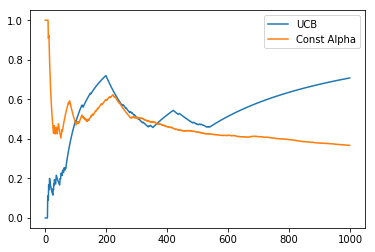

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

class bandit_arm_v4():
    def __init__(self, mean: float, std: float):
        # Start equally
        self.mean = 0
        self.std = 0.1
        
        # Random walk parameters
        self.mean_change = mean
        self.std_change = std
        
        self.distribution = np.random.normal
        
    def random_walk(self):
        self.mean += self.distribution(loc=self.mean_change,
                                       scale=self.std_change)
        
    def r(self):
        while True:
            self.random_walk()
            yield self.distribution(loc=self.mean, 
                                    scale=self.std)

class bandit_v4():
    def __init__(self, k: int, c: int):
        self.A = self._create_arms(k)
        self.R = dict()
        self.n = 0
        self.c = c
        self.chosen = np.zeros(k)
        self.total_reward = 0
        self.cum_rewards = []
        self.is_optimal = 0
        self.cum_optimal = []
        
    def game(self, T: int):
        self.R = self._init_rewards()
        self.total_reward = 0
        self.n = 0
        for i in range(T):
            self.n += 1
            Rt = self.play()
            self.total_reward += Rt
            self.cum_rewards.append(self.total_reward)
            self.cum_optimal.append(self.is_optimal / (i+1))
        return self.total_reward
            
    def play(self):
        a = self._choose_action()
        self.is_optimal += self._is_optimal(a)
        return self._do_action(a)
        
    def _create_arms(self, k: int):
        return [bandit_arm_v4(0, 1) for a in range(k)]
    
    def _get_optimal_hand(self):
        hands_rewards = list(map(lambda arm: arm.mean, self.A))
        #print(f'_get_optimal_hand:\t{hands_rewards})')
        return np.argmax(hands_rewards)
    
    def _is_optimal(self, chosen_hand: int):
        return 1 if chosen_hand == self._get_optimal_hand() else 0
    
    def _init_rewards(self):
        rewards = dict()
        for arm in range(len(self.A)):
            rewards[arm] = 0
        return rewards
    
    def _choose_action(self):
        Qt_upper = [self._calc_bound(a, True) for a in range(len(self.A))]
        Qt_lower = [self._calc_bound(a, False) for a in range(len(self.A))]
        
        # Eliminate bad actions by bound-checking
        possible_arms = [self._test_arm_bounds(a, Qt_lower) for a in Qt_upper]
        
        # Return random arm from possible arms
        chosen_arm = np.random.choice(range(len(possible_arms)))
        #print(f'**{self.n}**\nQt_Upper: {Qt_upper}\nQt_Lower: {Qt_lower}\nPossibles: {possible_arms}')
        while (possible_arms[chosen_arm] == False):
            chosen_arm = np.random.choice(range(len(possible_arms)))
        
        return chosen_arm
    
    def _test_arm_bounds(self, arm_upper_bound: float, arms_lower_bounds: list):
        arm_test = [arm_upper_bound < arm_lower_bound for arm_lower_bound in arms_lower_bounds]
        #print(f'ub: {arm_upper_bound}\tlbs: {arms_lower_bounds}')
        if True in arm_test:
            return False
        return True
    
    def _Q(self, a):
        return self.R[a] / self.chosen[a]
    
    def _calc_bound(self, a: int, upper: bool):
        N_t = self.chosen[a]
        calc_a = self._Q(a)
        calc_b = self.c * np.sqrt(np.log(self.n) / N_t)
        
        if upper:
            bound = calc_a + calc_b
        else:
            bound = calc_a - calc_b
        return bound
    
    def _do_action(self, a):
        Rt = next(self.A[a].r())
        self.R[a] += Rt
        self.chosen[a] += 1
        return Rt

k = 5
epsilon = 0.1
c = 2
T = 1000
bandit_UCB = bandit_v4(k, c)
bandit_dynamic_alpha = bandit_v3(k, epsilon, False)

def run_simulation(bandit):
    total_reward = bandit.game(T)
    optimal_reward = np.max(list(map(lambda x: x.mean, bandit.A)))
    total_optimal_reward = T * optimal_reward
    print('K-Arm Bandit with UCB Q Function')
    print(f'Total Reward: {total_reward}')
    print(f'Optimal Reward: {optimal_reward}\tOptimal Total Reward: {total_optimal_reward}')
    print(f'Regret: {total_optimal_reward - total_reward} / {100*(1-(total_reward/total_optimal_reward)):.2f}%')
    for i in bandit.R:
        print(f'arm {i}:\t # chosen: {bandit.chosen[i]:0.0f}\t mean: {bandit.R[i]}\t true: {bandit.A[i].mean}\t delta: {abs(bandit.A[i].mean-bandit.R[i])}\t delta %: {abs(1-bandit.A[i].mean/np.mean(bandit.R[i]))}\n')
    return bandit

print('**UCB**')
bc = run_simulation(bandit_UCB)
bd = run_simulation(bandit_dynamic_alpha)

plt.plot(bc.cum_optimal, label='UCB')
plt.plot(bd.cum_optimal, label='Const Alpha')
plt.legend()
plt.show()

**Exercise 2.8**: UCB Spikes In Figure 2.4 the UCB algorithm shows a distinct spike in performance on the 11th step. Why is this? Note that for your answer to be fully satisfactory it must explain both why the reward increases on the 11th step and why it decreases on the subsequent steps. Hint: if c = 1, then the spike is less prominent.

**Answer**: The spike happens due to the algorithm beginning to eliminate non-profitable arms.
When the algorithm starts it takes about K steps (or a bit more) until all hands are tested and base bounds are calculated.
It then takes a few more turns until the bounds starts to tighten and the worst hands are being knocked off.

### Gradient bandit

All the methods up to this one were based on estimating the action value, and using the estimate to choose the proper hand.   In this variation we will try to choose hands by a numerical preference $H_t(a)$ (The larger, the more likely we are to choose it).   $H_t(a)$ doesn't have any interpertation in terms of reward but instead it is relative to the other hands and determined by a soft-max function (Gibbs / Boltzman distribution).

$Pr(A_t=a) = \frac{e^{H_t(a)}}{\sum_{b=1}^{k}{e^{H_t(b)}}} = \pi_t(a)$

$H_t(a)$ is based on **Stochastic gradient ascent**:

$H_{t+1}(A_t) = H_t(A) + \alpha(R-\hat{R_t})(1-\pi_t(A_t))$ || for $a=A_t$

$H_{t+1}(a) = H_{t}(a) - \alpha(R-\hat{R_t})\pi_t(a)$ || for $a \neq A_t$

* $\alpha$: Step-size parameter
* $\pi_t(a)$: Soft-Max distribution of the wanted class by $H_t(a)$
* $\hat{R}$: Aerege of results up to (including) the current sample

Every round we will check the reward given by $a = A_t$ (The chosen action).  
If the reward is greater then the current baseline $(\hat{R_t})$ then we will increase it's chances of being selected $(\pi_t(A_t))$ by an amount regulated by $\alpha$ and decrease the chance of the other hands to be selected by that same principle.


**Gradient**
K-Arm Bandit with Gradient Q Function
Total Reward: -335.65077756234757
Optimal Reward: 2.6315649340321774	Optimal Total Reward: 2631.5649340321775
Regret: 2967.215711594525 / 112.75%
arm 0:	 # chosen: 162	 mean: -241.94448837879736	 true: -9.13842005333618	 delta: 232.80606832546118	 delta %: 0.9622292695544743

arm 1:	 # chosen: 177	 mean: -249.33985769890012	 true: -3.8084944344632756	 delta: 245.53136326443683	 delta %: 0.9847256893879263

arm 2:	 # chosen: 297	 mean: 493.6006855511126	 true: 2.6315649340321774	 delta: 490.9691206170804	 delta %: 0.9946686359823549

arm 3:	 # chosen: 239	 mean: -242.7137505852771	 true: -5.364625258495997	 delta: 237.3491253267811	 delta %: 0.977897316301364

arm 4:	 # chosen: 125	 mean: -95.2533664504864	 true: -4.727430750187278	 delta: 90.52593570029912	 delta %: 0.9503699351912708



/Users/orz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in double_scalars
/Users/orz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in double_scalars
/Users/orz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:102: RuntimeWarning: divide by zero encountered in double_scalars


K-Arm Bandit with Gradient Q Function
Total Reward: 14860.31762150171
Optimal Reward: 24.299059050532	Optimal Total Reward: 24299.059050532
Regret: 9438.74142903029 / 38.84%
arm 0:	 # chosen: 17	 mean: -13.634765201471176	 true: -3.722478973952905	 delta: 9.91228622751827	 delta %: 0.7269862062933614

arm 1:	 # chosen: 189	 mean: 2828.9855778255624	 true: 24.299059050532	 delta: 2804.6865187750304	 delta %: 0.9914106811851586

arm 2:	 # chosen: 767	 mean: 12039.357148078308	 true: 4.740744841615989	 delta: 12034.616403236692	 delta %: 0.9996062294038371

arm 3:	 # chosen: 16	 mean: 4.019943218409309	 true: -0.530249366560285	 delta: 4.550192584969594	 delta %: 1.1319046906264771

arm 4:	 # chosen: 11	 mean: 1.5897175808910675	 true: 2.0001399586330657	 delta: 0.4104223777419982	 delta %: 0.25817313884894477



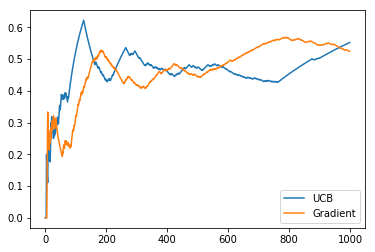

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
import scipy

class bandit_arm_v4():
    def __init__(self, mean: float, std: float):
        # Start equally
        self.mean = 0
        self.std = 0.1
        
        # Random walk parameters
        self.mean_change = mean
        self.std_change = std
        
        self.distribution = np.random.normal
        
    def random_walk(self):
        self.mean += self.distribution(loc=self.mean_change,
                                       scale=self.std_change)
        
    def r(self):
        while True:
            self.random_walk()
            yield self.distribution(loc=self.mean, 
                                    scale=self.std)

class bandit_gradient():
    def __init__(self, k: int, alpha: float):
        self.A = self._create_arms(k)
        self.R = {}
        self.R_sum = 0
        self.current_r = 0
        self.n = 0
        self.alpha = alpha
        self.H = np.array([1/k]*k)
        self.softmaxes = np.array([1/k]*k)
        self.chosen = np.zeros(k)
        self.total_reward = 0
        self.cum_rewards = []
        self.is_optimal = 0
        self.cum_optimal = []
        
    def game(self, T: int):
        self.R = self._init_rewards()
        self.total_reward = 0
        self.n = 0
        for i in range(T):
            self.n += 1
            Rt = self.play()
            self.total_reward += Rt
            self.cum_rewards.append(self.total_reward)
            self.cum_optimal.append(self.is_optimal / (i+1))
        return self.total_reward
            
    def play(self):
        a = self._choose_action()
        self.is_optimal += self._is_optimal(a)
        return self._do_action(a)
        
    def _create_arms(self, k: int):
        return [bandit_arm_v4(0, 1) for a in range(k)]
    
    def _get_optimal_hand(self):
        hands_rewards = list(map(lambda arm: arm.mean, self.A))
        #print(f'_get_optimal_hand:\t{hands_rewards})')
        return np.argmax(hands_rewards)
    
    def _is_optimal(self, chosen_hand: int):
        return 1 if chosen_hand == self._get_optimal_hand() else 0
    
    def _init_rewards(self):
        rewards = dict()
        for arm in range(len(self.A)):
            rewards[arm] = 0
        return rewards
    
    def _choose_action(self):
        # Select arm by calculated Pi(a)
        chosen_arm = np.random.choice(range(k), p=self.softmaxes)
        #print(f'**{self.n}**\nQt_Upper: {Qt_upper}\nQt_Lower: {Qt_lower}\nPossibles: {possible_arms}')
        return chosen_arm
    
    def _pi(self, a):
        softmax_actions = scipy.special.softmax(self.H)
        a_t_softmax = softmax_actions[a]
        return a_t_softmax
    
    def _H(self, a: int, is_a_t: bool):
        pi = (1-self._pi(a)) if is_a_t else self._pi(a)
        update = self.alpha*(self.current_r-self.R_hat)
        h_t = self.H[a] + (update * pi)
#         print(f'H({a}| (At == {is_a_t})): {h_t}')
        return h_t
    
    def _do_action(self, a):
        Rt = next(self.A[a].r())
        self.current_r = Rt
        self.R[a] += Rt
        self.R_sum += Rt
        self.n += 1
        self.R_hat = self.R_sum / self.n
        self.H = [self._H(action, action==a) for action in range(len(self.A))]
        self.softmaxes = scipy.special.softmax(self.H)
#         print(f'softmaxes: {self.softmaxes}')
        self.chosen[a] += 1
        return Rt

k = 5
epsilon = 0.1
c = 2
T = 1000
bandit_UCB = bandit_v4(k, c)
bandit_gradient = bandit_gradient(k, epsilon)

def run_simulation(bandit):
    total_reward = bandit.game(T)
    optimal_reward = np.max(list(map(lambda x: x.mean, bandit.A)))
    total_optimal_reward = T * optimal_reward
    print('K-Arm Bandit with Gradient Q Function')
    print(f'Total Reward: {total_reward}')
    print(f'Optimal Reward: {optimal_reward}\tOptimal Total Reward: {total_optimal_reward}')
    print(f'Regret: {total_optimal_reward - total_reward} / {100*(1-(total_reward/total_optimal_reward)):.2f}%')
    for i in bandit.R:
        print(f'arm {i}:\t # chosen: {bandit.chosen[i]:0.0f}\t mean: {bandit.R[i]}\t true: {bandit.A[i].mean}\t delta: {abs(bandit.A[i].mean-bandit.R[i])}\t delta %: {abs(1-bandit.A[i].mean/np.mean(bandit.R[i]))}\n')
    return bandit

print('**Gradient**')
bc = run_simulation(bandit_UCB)
bd = run_simulation(bandit_gradient)

plt.plot(bc.cum_optimal, label='UCB')
plt.plot(bd.cum_optimal, label='Gradient')
plt.legend()
plt.show()